In [1]:
from twitterscraper import query_tweets
from twitterscraper.query import query_tweets_from_user

import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
users = ['binusonline', 'unj_official', 'pintaria_id', 'lsprjakarta']
tweets = []

for i in range(len(users)):
  tweets.append(query_tweets_from_user(users[i]))

In [3]:
output = [] 
  
def twitter(tweets): 
  for i in tweets: 
    if type(i) == list: 
        twitter(i) 
    else: 
        output.append(i) 

In [4]:
twitter(tweets)

In [5]:
df = pd.DataFrame(t.__dict__ for t in output)

In [6]:
df.head()

,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,links,hashtags,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
0,binusonline,BINUSOnlineLearning,245204182,1117732103896977408,/binusonline/status/1117732103896977408,2019-04-15 10:11:14,1555323074,Program tersebut dirancang dengan menggunakan ...,"<p class=""TweetTextSize TweetTextSize--normal ...",[],[],False,[],,2,0,1,True,False,,[]
1,binusonline,BINUSOnlineLearning,245204182,1117732071089135617,/binusonline/status/1117732071089135617,2019-04-15 10:11:06,1555323066,Kebutuhan terhadap perkembangan teknologi yang...,"<p class=""TweetTextSize TweetTextSize--normal ...",[],[],True,[https://pbs.twimg.com/media/D4L7XsBUcAEMO2f.j...,,1,0,0,False,False,,[]
2,binusonline,BINUSOnlineLearning,245204182,1106828433852514305,/binusonline/status/1106828433852514305,2019-03-16 08:03:57,1552723437,Tujuan BINUS Online Learning hadir di Bandung ...,"<p class=""TweetTextSize TweetTextSize--normal ...",[],[],True,[https://pbs.twimg.com/media/D1w-kipU4AAhdNh.j...,,2,0,0,False,False,,[]
3,binusonline,BINUSOnlineLearning,245204182,1106828370115911680,/binusonline/status/1106828370115911680,2019-03-16 08:03:41,1552723421,BINUS ONLINE LEARNING menjawab kebutuhan masya...,"<p class=""TweetTextSize TweetTextSize--normal ...",[],[],True,[https://pbs.twimg.com/media/D1w-hNLVAAEYFDa.j...,,1,0,0,False,False,,[]
4,binusonline,BINUSOnlineLearning,245204182,1104940004285927426,/binusonline/status/1104940004285927426,2019-03-11 03:00:00,1552273200,"Selamat hari senin BINUSIAN, tetap semangat me...","<p class=""TweetTextSize TweetTextSize--normal ...",[],[],True,[https://pbs.twimg.com/media/D0zq3cjVsAAnNK3.jpg],,1,0,1,True,False,,[]


In [7]:
data = df[(df['screen_name'].isin(['binusonline','UNJ_Official', 'pintaria_id', 'LSPRJakarta']))]

In [8]:
twitter_crawl = data[['username', 'tweet_url','timestamp','text','img_urls','video_url','likes','retweets','replies']]

In [9]:
twitter_crawl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2139 entries, 0 to 2209
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   username   2139 non-null   object        
 1   tweet_url  2139 non-null   object        
 2   timestamp  2139 non-null   datetime64[ns]
 3   text       2139 non-null   object        
 4   img_urls   2139 non-null   object        
 5   video_url  2139 non-null   object        
 6   likes      2139 non-null   int64         
 7   retweets   2139 non-null   int64         
 8   replies    2139 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 167.1+ KB


In [10]:
twitter_crawl.to_csv('UnivTwitterCrawl.csv', index=False)

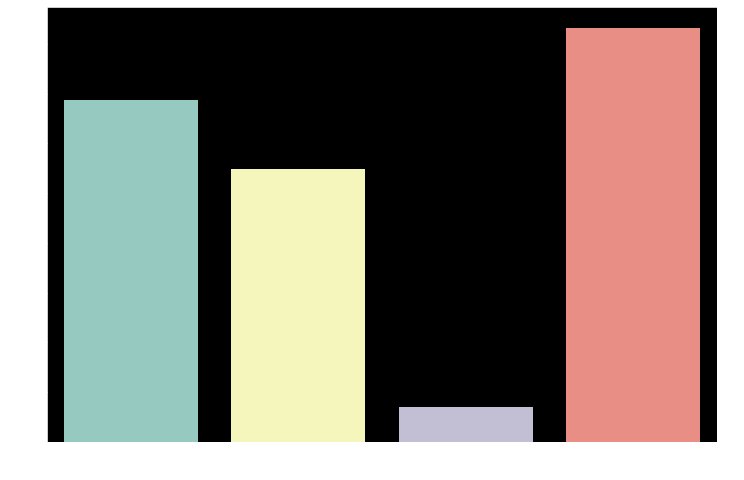

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(x='username', data = twitter_crawl)
plt.show()

In [17]:
retweets = twitter_crawl.groupby(['username'])['retweets'].agg('sum')
retweets

username
BINUSOnlineLearning                         110
LSPR Communication & Business Institute     171
Pintaria                                      0
UNIV. NEGERI JAKARTA                       7452
Name: retweets, dtype: int64

In [18]:
likes = twitter_crawl.groupby(['username'])['likes'].agg('sum')
likes

username
BINUSOnlineLearning                          480
LSPR Communication & Business Institute      710
Pintaria                                       3
UNIV. NEGERI JAKARTA                       11106
Name: likes, dtype: int64